In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array , load_img


CNN Model

In [56]:
# CNN Model
model = Sequential()

model.add(Conv2D(filters= 16 , kernel_size= (3,3), activation= 'relu'))

model.add(Conv2D(filters= 36 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128 , kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten(input_shape = (224,224,3) ))
model.add(Dense(units=64,activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))


#model.summary()


In [57]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy']) 

Preparing our Data using Data generator

In [58]:
def preprocessingpretrainedimages(path):
    # input : path 
    # output : pre trained images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True)  #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 64, class_mode= 'binary')

    return image

def preprocessingpretestedimages(path):
    # input : path 
    # output : pre tested images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True) #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 6, class_mode= 'binary')

    return image  

def preProcessingValImages(path):
    # input : path 
    # output : pre tested images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/225, horizontal_flip= True) #data augmentation
    image = image_data.flow_from_directory(directory= path, target_size= (224,244),batch_size= 6, class_mode= 'binary')

    return image        

In [59]:
train_path = "Train"
test_path = "Test"
val_path="validation"

train_data = preprocessingpretrainedimages(train_path)
test_data = preprocessingpretrainedimages(test_path)
val_data = preProcessingValImages(val_path)


Found 1381 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Early Stopping & Model Checkpoints

In [60]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=6,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="BvsB.h5",save_best_only=True,verbose=1,mode='auto') 
cd=[es,mc] 

Model Training

In [61]:
model_history = model.fit_generator(generator= train_data, steps_per_epoch= 8 , epochs= 30, verbose= 1, validation_data= val_data, validation_steps= 16,callbacks= cd )

/tmp/ipykernel_7446/53290282.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(generator= train_data, steps_per_epoch= 8 , epochs= 30, verbose= 1, validation_data= val_data, validation_steps= 16,callbacks= cd )


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7242 - accuracy: 0.6367
Epoch 1: val_accuracy improved from -inf to 0.79167, saving model to BvsB.h5
8/8 [==============================] - 24s 3s/step - loss: 0.7242 - accuracy: 0.6367 - val_loss: 0.4384 - val_accuracy: 0.7917
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.2783 - accuracy: 0.9004
Epoch 2: val_accuracy improved from 0.79167 to 1.00000, saving model to BvsB.h5
8/8 [==============================] - 23s 3s/step - loss: 0.2783 - accuracy: 0.9004 - val_loss: 0.3141 - val_accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.1918 - accuracy: 0.9814
Epoch 3: val_accuracy did not improve from 1.00000
8/8 [==============================] - 22s 3s/step - loss: 0.1918 - accuracy: 0.9814 - val_loss: 0.0817 - val_accuracy: 0.9792
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9805
Epoch 4: val_accuracy did not improve from 

Model Graphical Interpretation

In [62]:
h = model_history.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

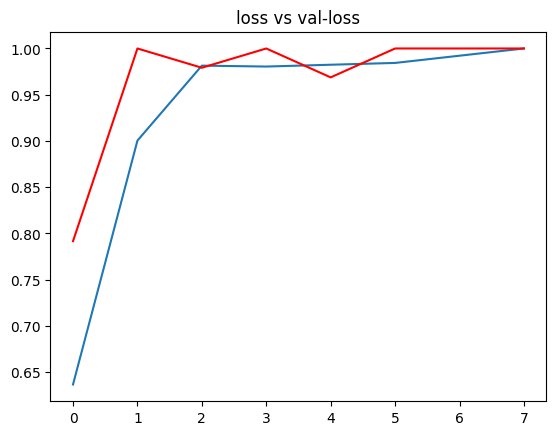

In [63]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")

plt.title("loss vs val-loss")
plt.show()


Model Accuracy

In [64]:
from keras.models import load_model

acc = model.evaluate(val_data)[1]

print(f"the accuracy of our model is { acc * 100 } % ")




50/50 [==============================] - 4s 85ms/step - loss: 0.0052 - accuracy: 1.0000
the accuracy of our model is 100.0 % 


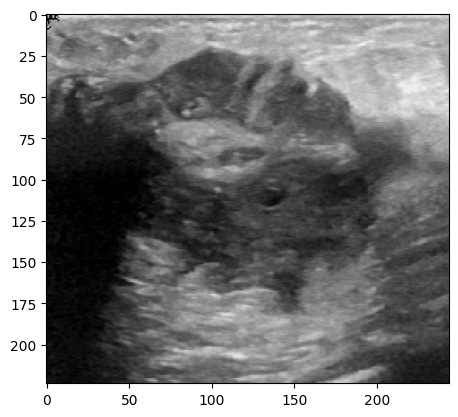

1/1 [==============================] - 0s 27ms/step
image is a breast scan with prediction of 0.9881879687309265


In [66]:
path = "Test/breast/benign (400).png"

img = load_img(path , target_size= (224,244))
input_arr = img_to_array(img)/255
input_arr = np.expand_dims(input_arr,axis=0)

plt.imshow(img)
plt.show()

pred = model.predict(input_arr)[0][0]


if pred < 0.5:
    print(f"image is a brain scan with prediction of { pred }")
else:
    print(f"image is a breast scan with prediction of { pred }")   
